## Problem 1

Here, we will write code to draw samples from the exponential distribution $p(x) = e^{-x}$ with $x \in [0, \infty]$ using rejection and inverse transform sampling. 

In particular, for the rejection algorithm, we will sample points in the range of $x \in [0, 20]$, since we cannot sample up to $\infty$. For both algorithms, we will make $1000$ draws. To make this a one-to-one comparison, we will only include samples for the rejection algorithm that pass the accept/reject criterion.

We will present histograms obtained from both sampling algorithms plotted against the true underlying probability distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate the true distribution
x = np.linspace(0, 20, 1000000) 
true_values = np.e ** (-x)

# initialize random number engine
rng = np.random.default_rng()

In [3]:
# rejection sampling
accepted_samples = []
while len(accepted_samples) < 1000: # go until we reach 1000 passes
    x_i = 20 * rng.random()
    y_i = rng.random()
    threshold = np.e ** (-x_i)
    accept = False
    if y_i < threshold:
        accept = True
    if accept:
        accepted_samples.append(x_i)

It happens here that it is easy to get an analytical expression for the CDF and then to invert it; in particular,

$$\mathrm{CDF}(x) = \int_0^{x} dx' p(x')  = \int_0^{x} dx' e^{-x'} = 1 - e^{-x}$$

so to calculate $\mathrm{CDF}^{-1}(x)$, we put $$u := 1 - e^{-x} \implies x = -\ln(1-u)$$

so that if we draw $u_i \sim U[0,1]$, then the samples $x_i = -\ln(1-u_i)$ are distributed according to the exponential distribution.

(Note: In general, though, it need not be the case that the PDF is analytically integrable and that the resulting expression is easily invertible. In this case, we can do the inverse transform sampling numerically, leveraging $\mathtt{np.cumsum}$ and $\mathtt{scipy.interpolate}$).

In [4]:
# inverse transform sampling
random_1000 = rng.random(1000)
its_samples = -np.log(1.0 - random_1000)

Text(0.5, 1.0, 'Sampling the Exponential Distribution')

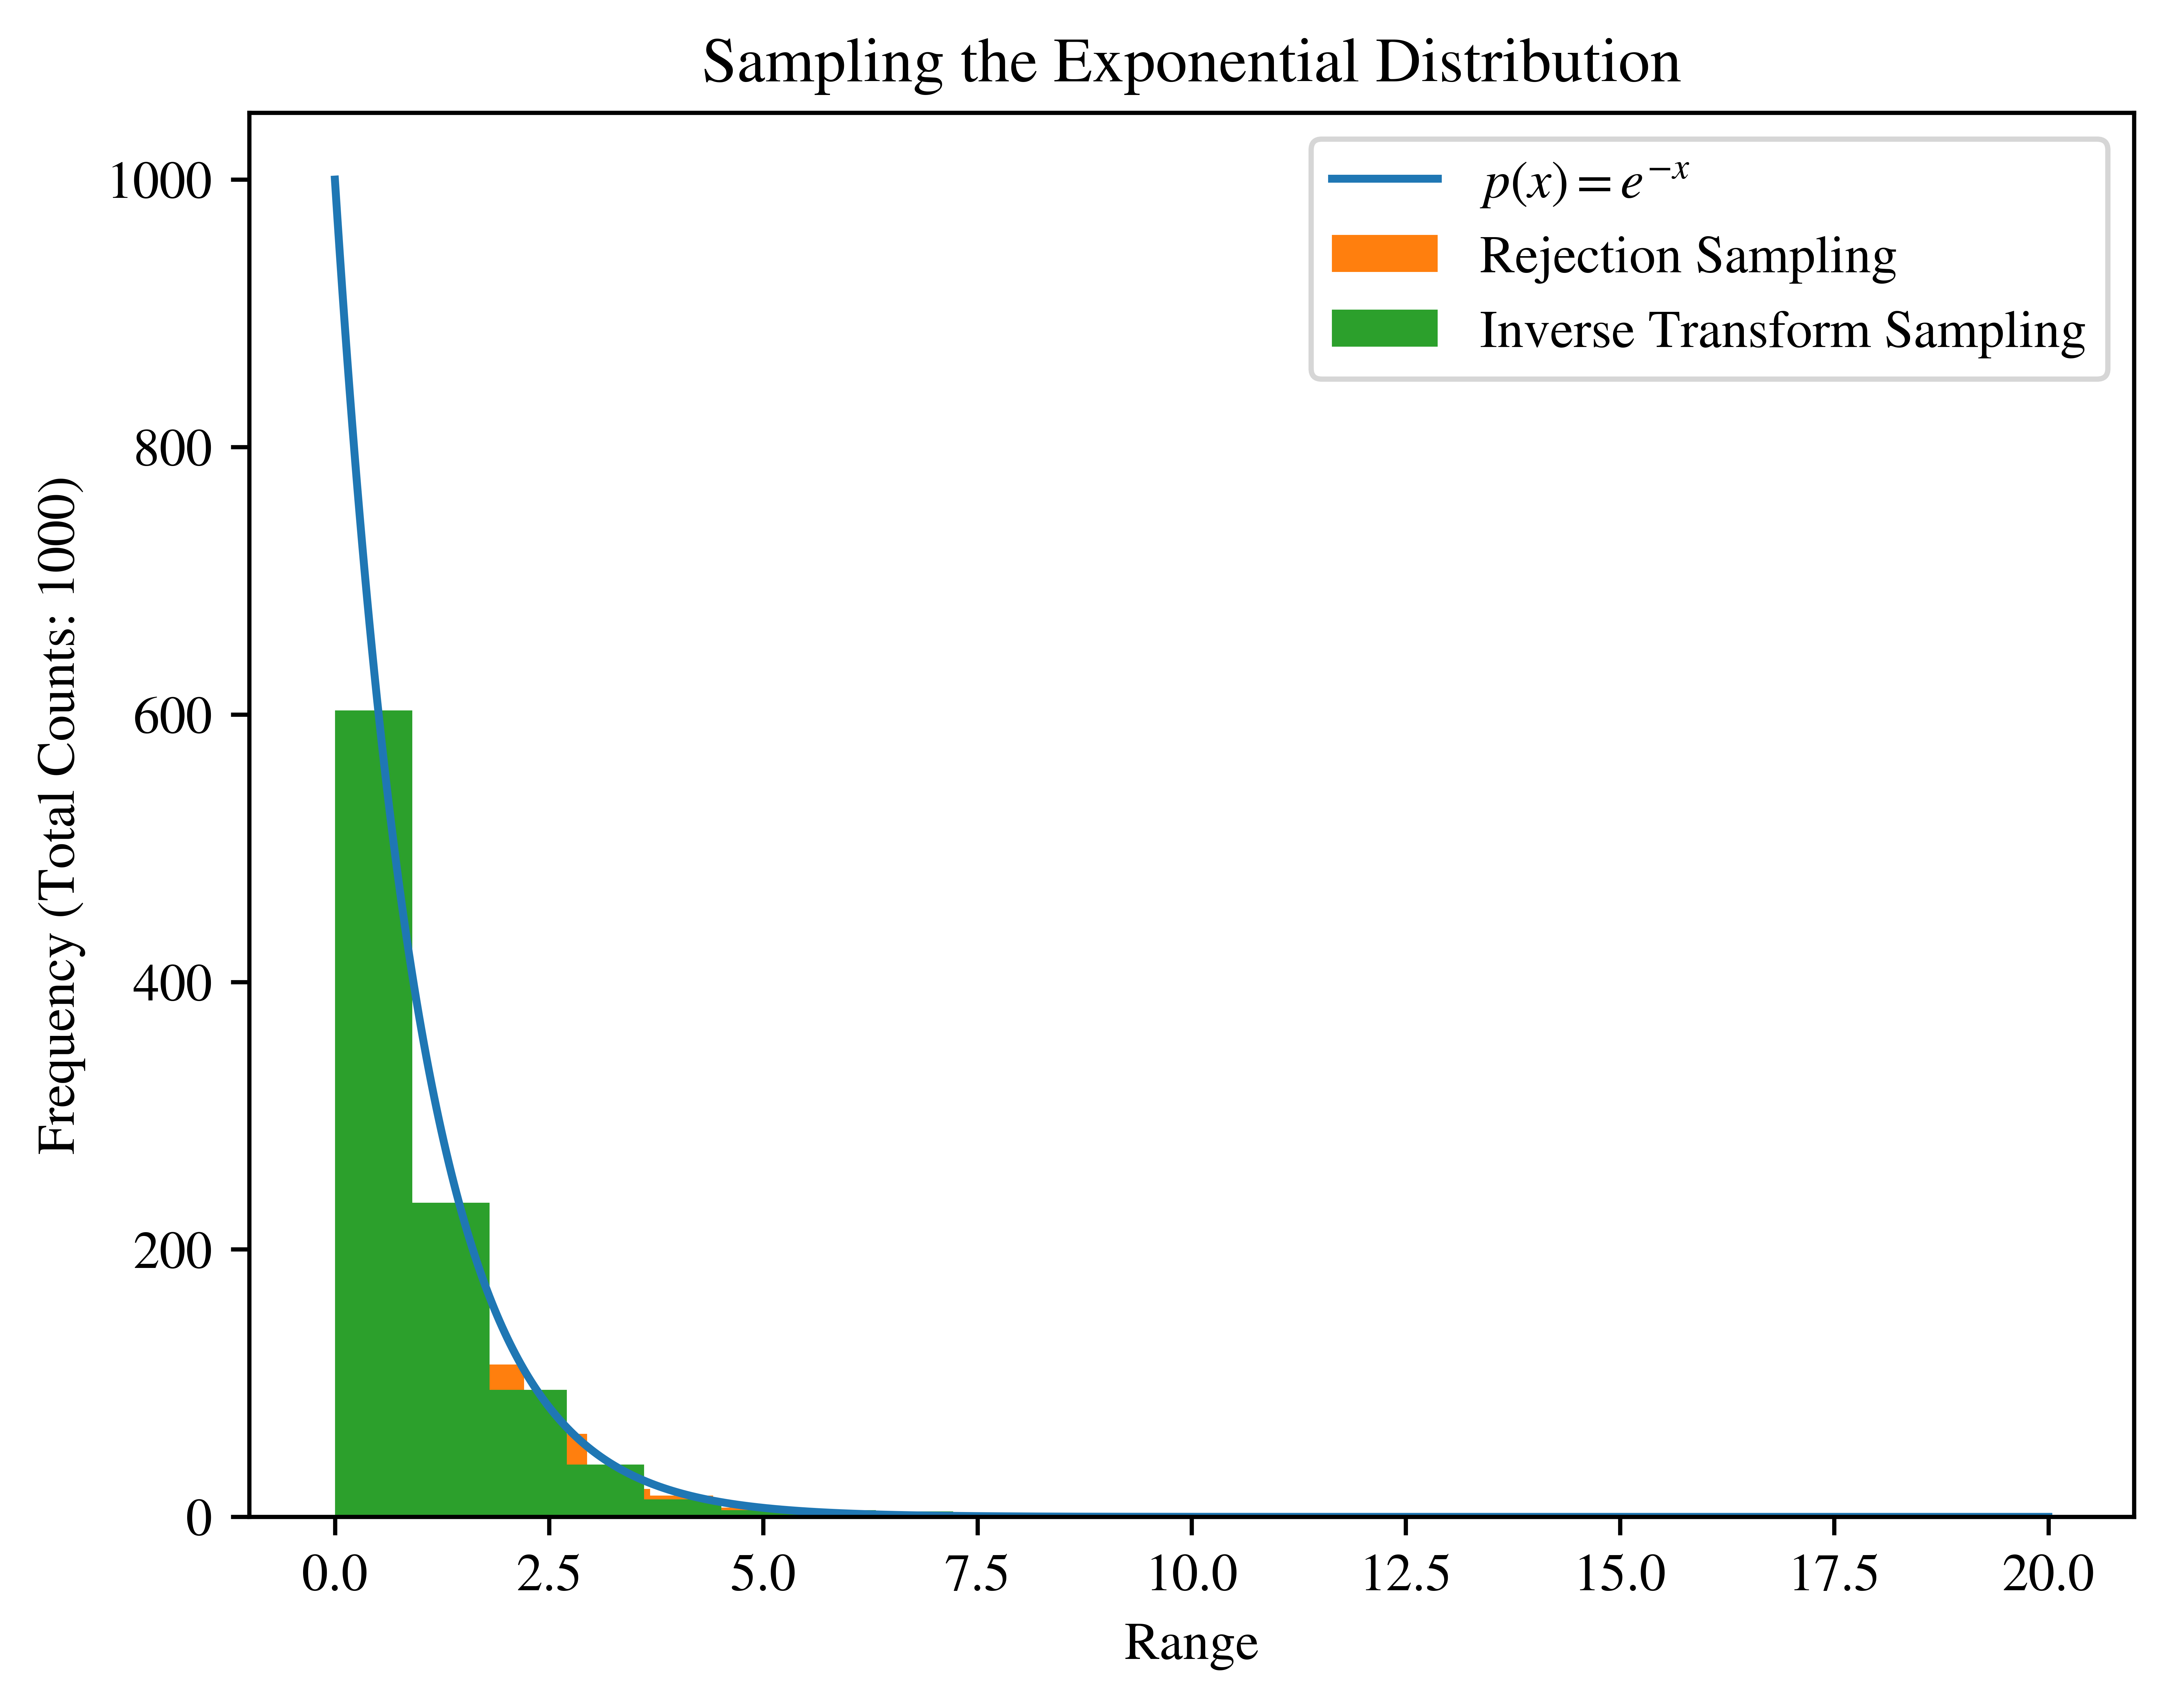

In [5]:
# plotting
fig = plt.figure(dpi = 1200)
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral'

ax = fig.add_subplot(111)
ax.plot(x, 1000*true_values, label = "$p(x) = e^{-x}$") 
ax.hist(accepted_samples, label = "Rejection Sampling")
ax.hist(its_samples, label = "Inverse Transform Sampling")
ax.legend()
ax.set_xlabel("Range")
ax.set_ylabel("Frequency (Total Counts: 1000)")
ax.set_title("Sampling the Exponential Distribution")